# Ensemble Learning & Random Forests

When you aggregate the predictions of a group of predictors (such as classifiers and regressors) you are likely to get better predictors. A group of predictors is called an _ensemble_. Hence, _Ensemble Learning_ is a method/techinque that is very helpful for creating robust models. 

**Random Forest**: train a group fo Decision Tree classifiers --each on a differnet random subset of training set. Make for all individual trees, then predict the class that gets the most votes. This ensemble is one of the most powerful ML algos available today. 

You will often use Ensemble methods near the end of a project, once you already built a few good predictors, in order to combine them into a monster predictor. --this is often how prize winning solutions in ML competitions are made. 

In this ch, we'll discuss popular ensemble methods --bagging, boosting, stacking, random forests.


## Voting Classifers

Let's say you trained sevreal classifiers all with 80% accuracy. 

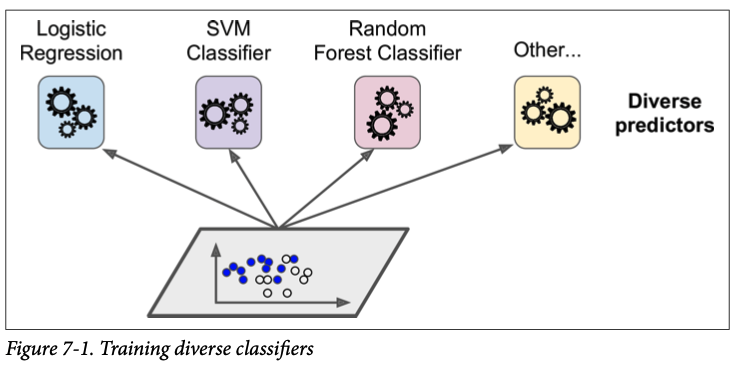

A simple way to improve your classifer is to aggregate the predictions & predict class w/ the most votes. This is called _hard voting_ classifer. 
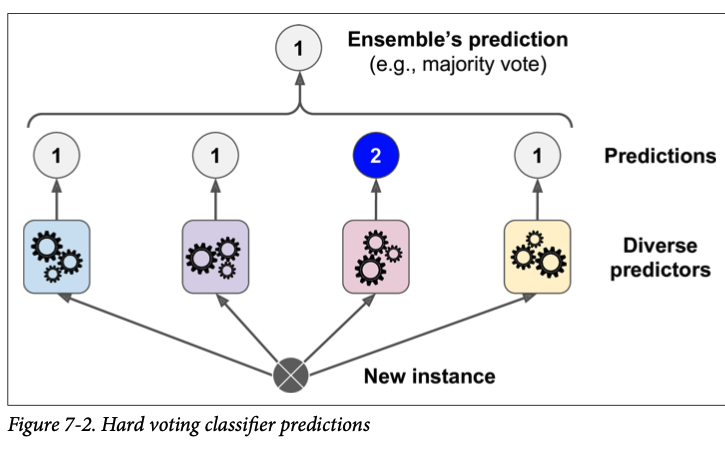



In [3]:
# The following code creates and trains a voting classifer using 3 diverse classifer types in SKlearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard')
voting_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [2]:
# Let's look at the accuracy of each classifier on the test set.

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

NameError: name 'log_clf' is not defined

This is the output of the code: 
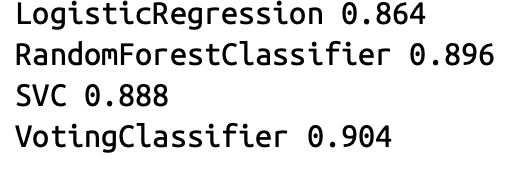

You see, the voting classifier outperforms all the individual classifiers.

If all the classifiers in your enssemble are able to estimate class probability, you can tell sklearn to predict the class w/ the highest class prob, averaged over all the individual classifiers. 
This is called _soft voting_ --this method often achieves higher performance than hard voting since it gives more weight to highly confident votes. All you need to do is replace voting = "hard" -> voting = "soft". 

If you use soft voting, you will find that the classifier has 91.2% accuracy. 

## Bagging and Pasting

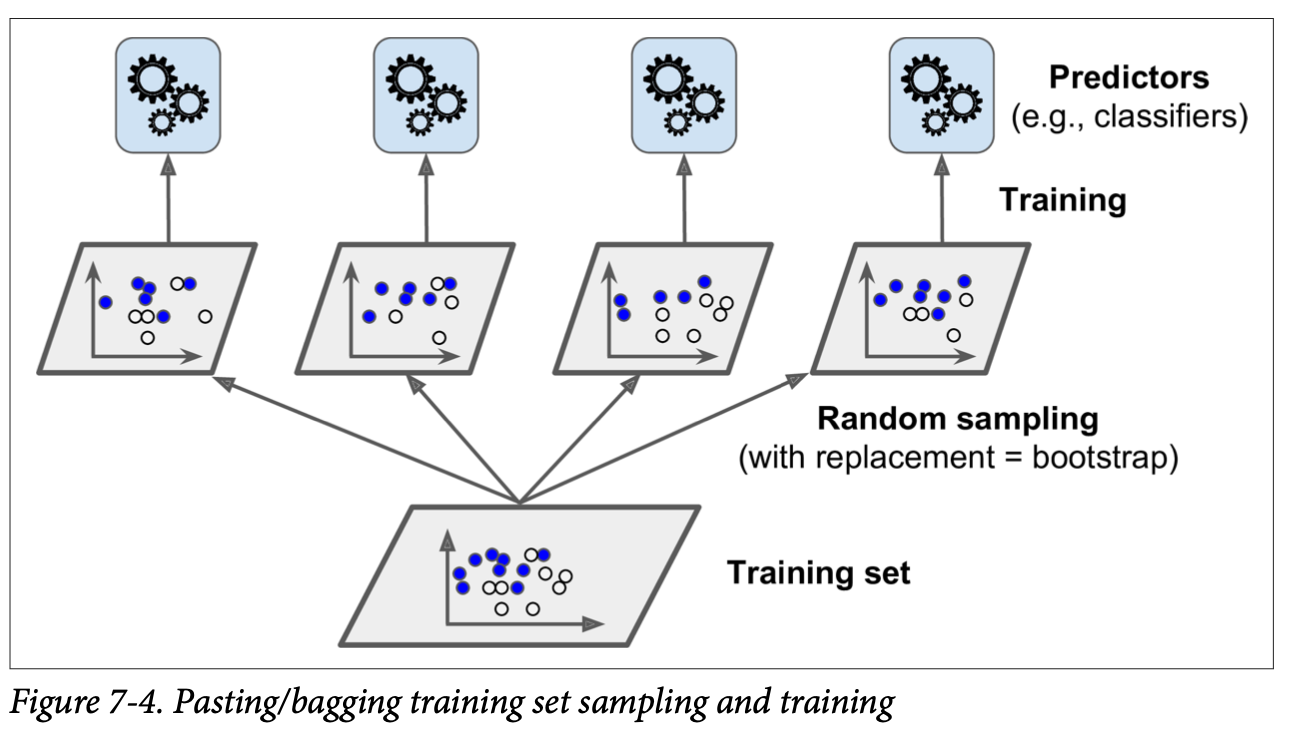

Just like we talked about earlier, one way to get a diverse set of classifiers is to use very different algos.

But another approach is to use the same training algos for every predictor, but to train them on different random subsets of training set:

when sampling is peformed with replacement this is called _bagging_ --short for bootstrap aggregating. 

when samplingis kdone without replacement, it is called _pasting_. 

Both bagging and pasting allow training instances to be sampled serveral times across multiple predictors, but only bagging allows instances to be sampled serveral times for the same predictors (since the there is replacement).

Once all predcitors are trained, the ensemeble makes predictors for a new instance by aggregating the predictions of all predictors. The aggregation function is typpically the _statistical mode_ (most freuqent prediction --similar to hard voting classifie) for classification & the average for the regression.

The benefit of the ensemble used after bagging & pasting is that they scale very well --ie. they decrease the overall varaince. 


### Bagging & Pasting in SKlearn

For classifiers, SK offers an API called BaggingClassifier class (BaggingREgressor for regression).
The following code trains an ensemble of 500 Deicision Tree classifiers, each trained on 100 trianing instances randomly smapled form the trianing set w/ replacement (ie. bagging --but if you want to use pasting instead: boostrap = False). 

n_jobs parameter tells Scikit-learn the # of CPU cores to use for training and predictions (-1 tells SK to use all available cores)


In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

NameError: name 'X_train' is not defined

The BaggingClassifier by default performs soft voting if the base classifier can estimate class probabilties (ie. has the prodict_proba() method --this is indeed the case for Deicision Tree classifiers.
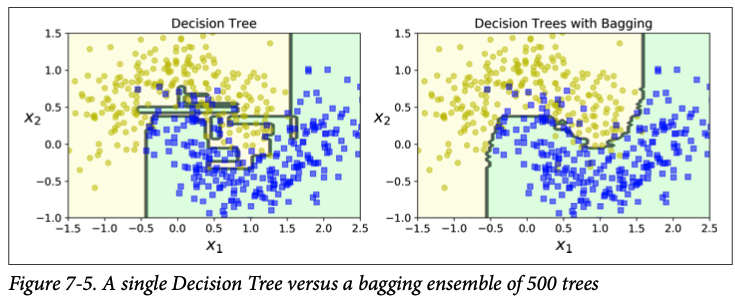
This image compares a single Decision Tree w/ the deicison boundary of a bagging ensemble of 500 trees. You can see, the ensemble predicitions are more generalizable. 

Bootstrapping introduces more diversity in the subsets that each predictor is trained on leading to higher bias than pasting, but this also means that predictors end up being less correlated reducing variance. Overall, bagging usually results in better models. 

## Out of bag (oob) Evaluation

When you are bagging, only about 63% of the sample data is randomly evaluated for each classifier. That means that 37% of the data that is "out of bag" (oob) can be used for testing/validation of the classifiers. 

You can then evaluate the peformance of the ensemble itself by averaging out the oob evalutation of each predictor. 

Set oob_score = True when crearing the BaggingClassifier to request automatic oob evaluation after training. The resulting eval score is found as oob_score_ var:


In [4]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True)

bag_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

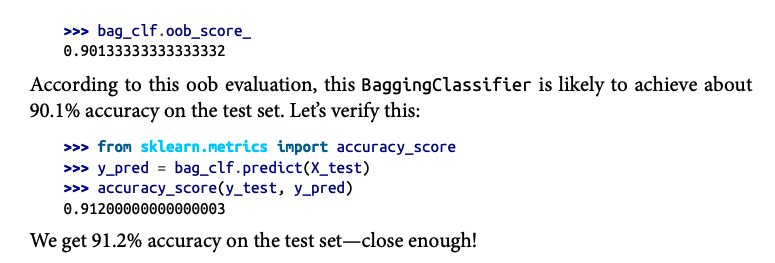

## Random Patches & Random Subspaces

The BaggingClassifier class supports sampling features as well as instances. It is controleld by two hyperparmeters: max_features and bootstrap_features. It works in a simlar ways at he max_sampel and boostrap. EAch predictor will be trained on a random subset of input features --especially useful when dealing w/ high-dimensional inputs (e.g., images)

sampling training instances & features is called the _Random Patch Method_

Keeping all training instances but sampling the features is called _Random Subspaces method_

Overall, sampling features adds even more diversity to the predictor-- decreasing variability at the cost of added bias (slightly though). 


## Random Forests

random forests is an ensemble of Decision Tree, usually trianed via the bagging method w/ a max_samples set size of the training set. Hence, random forest is a combo of deicision trees + bagging method.

You will use the RandomForestClassifer class. Below is an exmpale of a Random Forest classifier w/ 500 trees (each limited to 16 nodes) using all available CPU cores:


In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

NameError: name 'X_train' is not defined

RandomForestClassifier has all the hyperparameters of DecisionTreeClassifier (controls how trees are grown) + all the hyperparameters of a BaggingClassifier to control the ensemble itself. 

The random Forest algo introduces extra randomness when growing trees b/c instead of searching for the V best feaure when splitting a node, it searches for the best feature among a random subset of features. The trade of is a higher bias for a lower variance --typically yielding a better overall model. The following BaggingClassifier is pretty much the same as the previous RandomForestClassifier.

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = "random", max_leaf_nodes = 16),
    n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1)

NameError: name 'BaggingClassifier' is not defined

## Extra Trees

There is a way to introduce even more randomness into a Random Forest by means of random thresholds at each node. 

When you grow a tree in a random forest, at each node, only a random subset of the features is considered for splitting. Trees can be made even more random by using random thresholds for each feaures rather than search for the best possible thresholds (like Decision Trees regularly do). 

This extremely random forest is called _Extremely Randomized Trees_ ensemble (or Extra-Tress for short). Again, the trade-off is higher bias for lower variance in the model. This also makes Extra Tress much faster to train than regular Random Forests since finding the best possbile threshold for each feature at every node is one of the most time consuming tasks of growing the tree. 

You can create the Extra-Trees classifier using Sklearn class: ExtraTreesClassifier. 

note: it is hard to tell whether the extra tree classifier will be better than random forest apriori --so it is best to just do both and compare the results.

## Feature Importance

Another great quality of randomm forests is that it makes it easy to identify and measure the relative importance of each feature. 

SK learn does this by looking at how much teh tre nodes that use a feature is capable fo reducing impurity on average (across all trees in the forests). In other words, it is a weighted average where each node weight is equal to the number of training samples that are assosciated with it. 

SK learn comoputes thsi score automatically for each feature after training. You can access the results using the feauter_importances_ variable.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
        print(name, score)

sepal length (cm) 0.10441686561159927
sepal width (cm) 0.02674249792535055
petal length (cm) 0.40283935565689066
petal width (cm) 0.4660012808061596


You can see the relative importance of the feautres: petal length(44%), petal width(42%) sepal length (11%) and sepal width (2%).

similarly, if you train a randomforest classifier on the MNIST dataset, and plot the importance of each pixel, you will get the following:

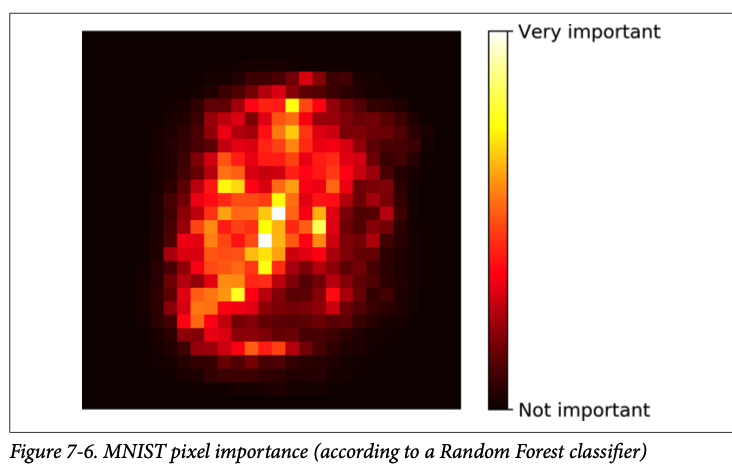

Overall, random forests are very helpful for quickly figuring out which features are important --especially helpful if you need to perform feature selection.

# Boosting 

booster-- any ensemble method that can combine several weak learners into a stronger learner (sequential learning technique). 

1. AdaBoost
2. Gradient Boost

## AdaBoost

the seuqence of predictors matters. in adaboost, you want new added predictors to correct its predecessor by paying a bit more attention to training instances that the predecessors underfitted. This allows for a gradual focusing on the hard cases. 

E.g. 
1. first a base classifier (e.g., decision tree) is trained and used to make predictions on the training set. 
2. The relative weight of misclassified training instances is increased. 
3. A second classifier is trianed using the updated weights and again it makes predictions on the training set, weights are updated, and so on. 

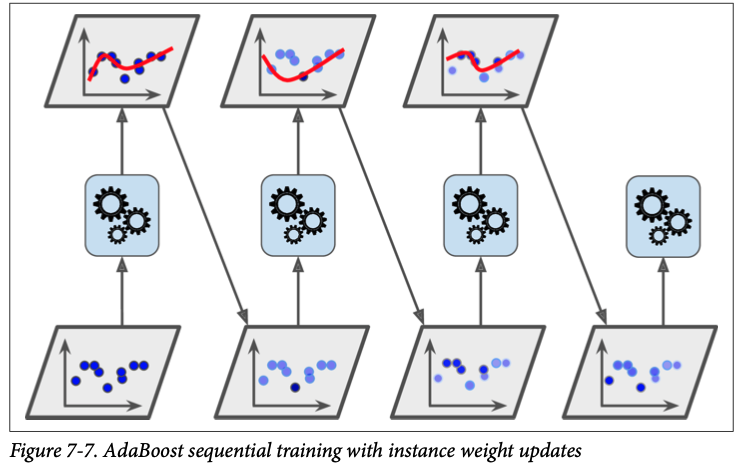

This shows the decision boundary for five consecutive predictors on the moons dataset (each predictor = SVM classifier w/ RBF kernel). The first classifier gets many inistances wrong, so their weights get boosted. 

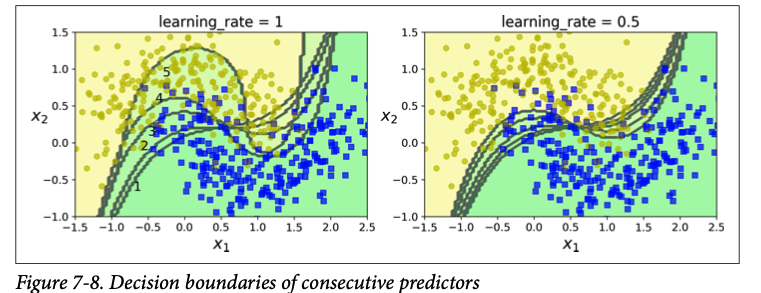
As you can see from the diagram, sequential learning is similar to gradient descent, except that isntead of tweaking a single predictor's parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better. 

Once all the training is done, the ensemble makes predictions much like the bagging or pasting methods, except the predictors have differnt weights depending on the orverall accuracy of the weighted training set. 

note: a drawback to training w/ sequential technique is that it can't undergo parallel processing --hence it can't scale as well as begging or pasting. 

### Under the hood: the AdaBoost Algo

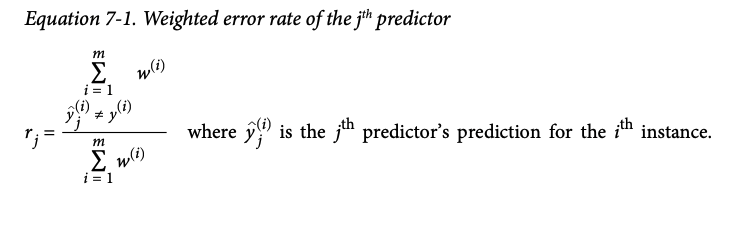

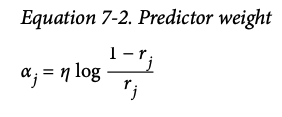

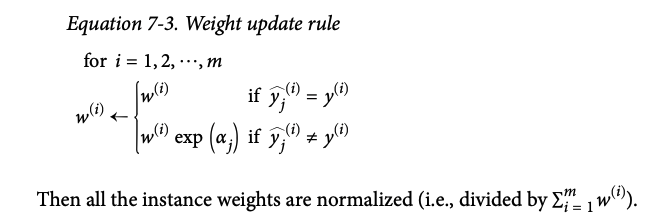

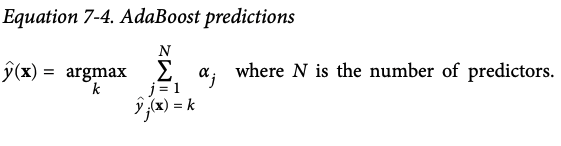

(Fig 7-2) At each sequence, the more accurate the predictor is, the higher the weight will be, by design of the algo. 
(Fig 7-3) The instances are upadted using this eq and the misclassified instances are boosted. 
Then, all instance weights are normalized. 

Finally, a new predictor is trained using hte updated weights, and the whole porcess is repeated. The algo stops wehn the desired number of predictors is reached --or when the perfect predictor is found. 

To make predictions, AdaBoost computes the predictions of all the predictors anad weighs them using th predictor weights alpha. The predicted class is the one that receives the majority of weighted votes. 

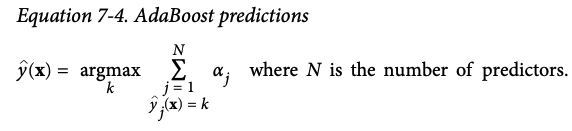

note: if your AdaBoost is overfitted, you can storngly regularize the base estimator. 

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200, 
    algorithm = "SAMME.R", learning_rate = 0.5)
ada_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

## Gradient Boosting

Gradient Boosting is sequential, similar to AdaBoost, but instead of gradually tweaking instance weights at every iteration, this method tries to fit the new predictor to the residual errors made by the previous predictor. 

Let's go through a simple regression using decision trees as the base predictors. 

In [18]:
# First let's fit a DecisionTreeRegressor to the training set (e.g. quad training set)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X,y)

NameError: name 'X' is not defined

In [19]:
# Now train a second DecisionTreeRegressor on the residual errors made by the first predictor:

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2) 
tree_reg2.fit(X, y3)


NameError: name 'y' is not defined

In [20]:
# Then we train a third regressor on the residual errors made by the second predictor: 

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth - 2)
tree_reg3.fit(X, y3)

NameError: name 'y2' is not defined

In [21]:
# Now we have an ensemble of three tree that can make a prediction on a new instance by adding up the 
# predictions of all the trees. 

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

NameError: name 'tree_reg2' is not defined

A simpler way to train GBRT ensembles is use sklearn's GradientBoostingRegressor class. It has hyperparameters to control the grotwth of the Decision Trees as well as to control the ensemble training (such as the number of trees. Look at the following code:


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X,y)

NameError: name 'X' is not defined

This shows how the ensemble method of Gradient boost improves upon the error fo the previous tree. 

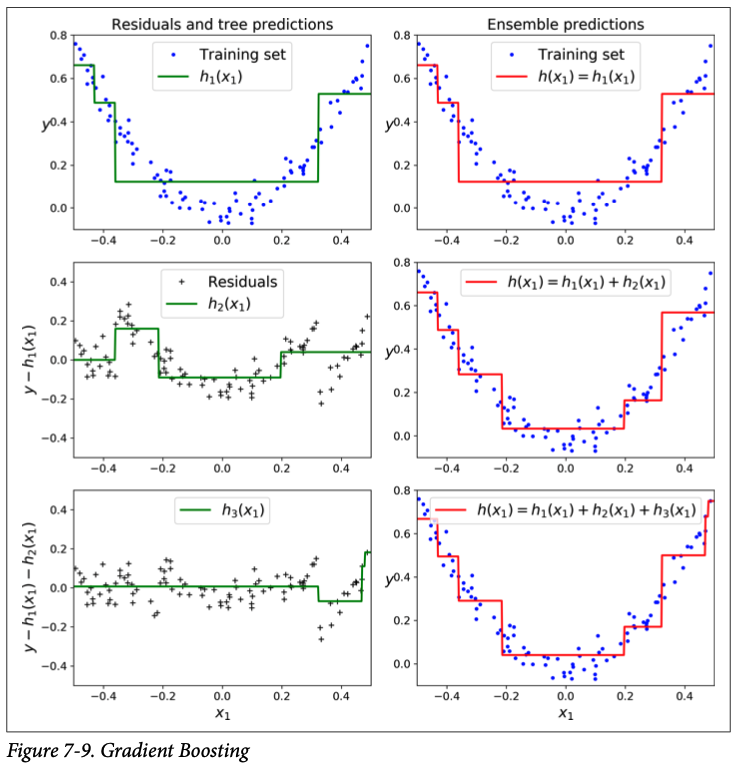

It is important that you find the optimal number of trees to pass in as hyperparameter (see image + code below)
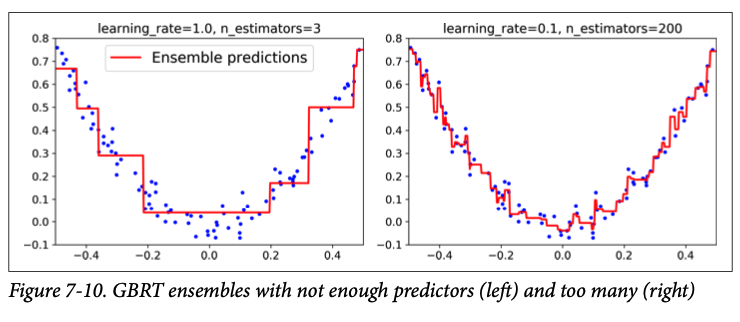


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators)
gbrt_best.fit(X_train, y_train)

NameError: name 'X' is not defined

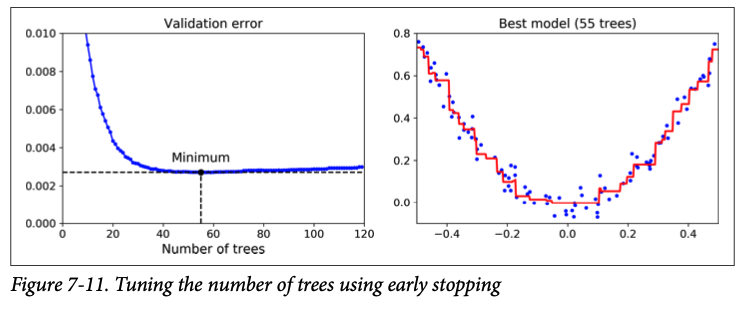
Code should result in these representations. You see how tuning the # of trees using the early stop is beneficial. 

There are 3 other ways of implementing early stop that is worth looking into:
1. warm_start = True (hyperparam) using SKlearn
2. Gradient boost regressor hyperaram called subsample --also called Stochasitic Gradient Boosting
3. XGBoost --autmoatic early stopping and general optimized implementation of Gradient Boosting

## Stacking

There is no implementation of this method by Sklearn, but you can do it manually. 

The concept is simple: Instead of using trivial functions (like hard voting) to aggregate the predictions of all predictors in an ensemble, why don't we train a model to perform this aggregation? 

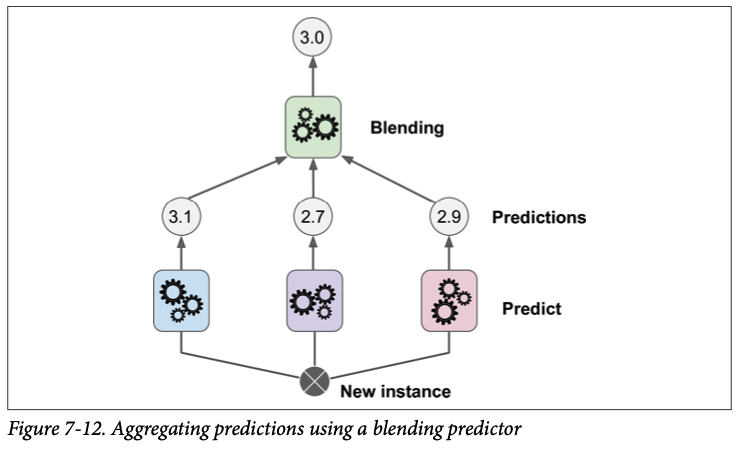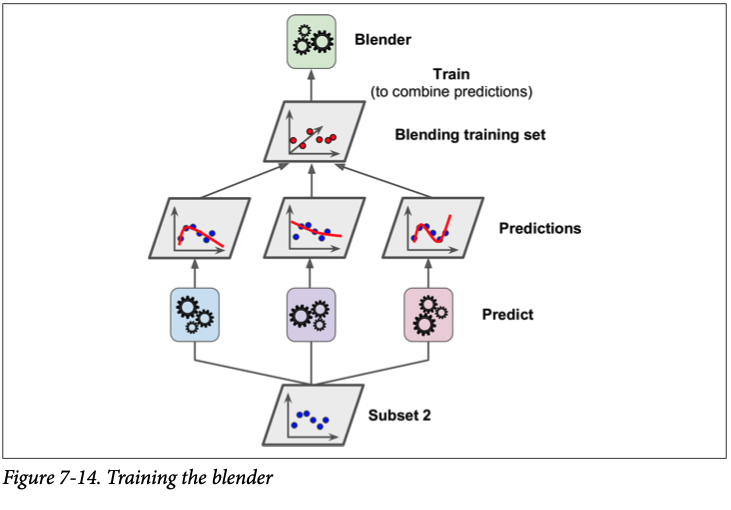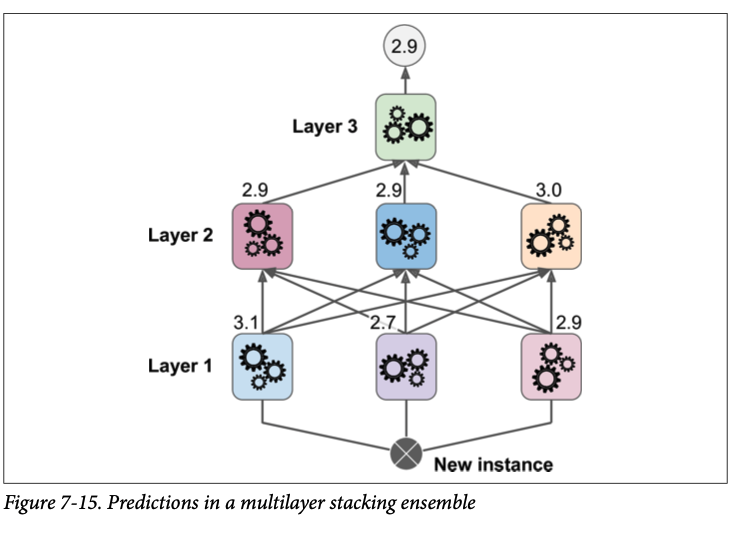



## Exercises:
(see page 213)

